Text(0, 0.5, 'y [cm]')

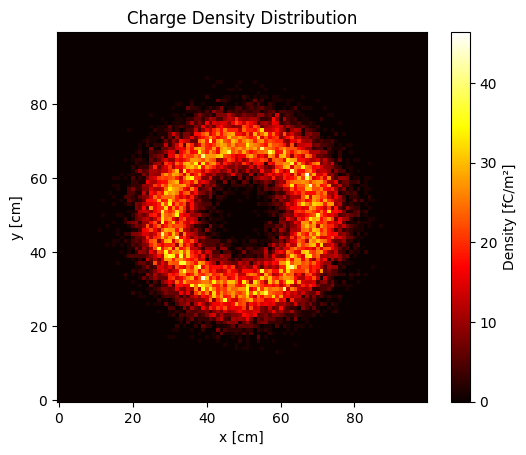

In [17]:
import numpy as np
import matplotlib.pyplot as plt

M = 100
rho = np.zeros((M, M))
with open("particles.dat", "r") as f:
    data = f.readlines()
    for line in data:
        x, y = line.split()
        rho[int(float(x))][int(float(y))] += 1


plt.imshow(1.6 * rho, cmap='hot', interpolation='nearest', origin='lower')
plt.colorbar(label='Density [fC/m²]')
plt.title('Charge Density Distribution')
plt.xlabel('x [cm]')
plt.ylabel('y [cm]')


Iteration 0, updating phi 2.0693569928764088e-05
Iteration 1000, updating phi 2.582597919786704e-06
Iteration 2000, updating phi 9.366744304099492e-07
Iteration 3000, updating phi 3.420901693879791e-07
Iteration 4000, updating phi 1.2494972604151777e-07
Iteration 5000, updating phi 4.563817081453675e-08
Iteration 6000, updating phi 1.6669422548895585e-08
Iteration 7000, updating phi 6.088534155145042e-09
Iteration 8000, updating phi 2.2238470171256908e-09
Iteration 9000, updating phi 8.122637337043548e-10
Iteration 10000, updating phi 2.9668064706334096e-10
Iteration 11000, updating phi 1.083630876003161e-10
Converged in 11080 iterations.


Text(0.5, 0, 'Iteration')

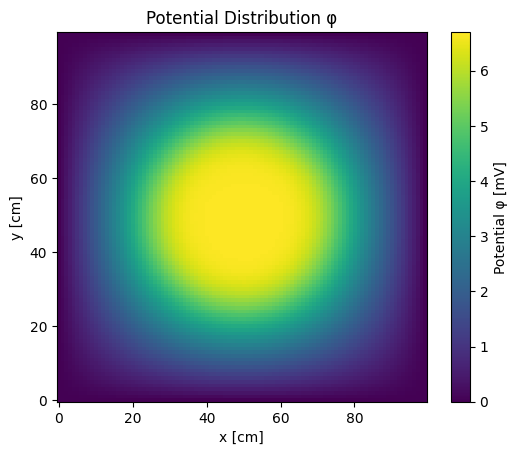

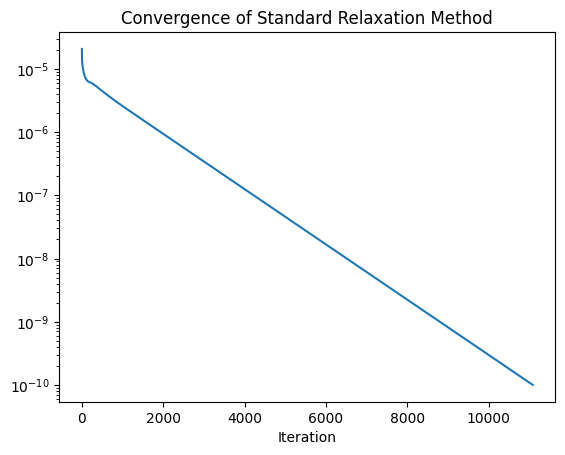

In [18]:
epsilon_0 = 8.854e-14
electron_charge = 1.6e-19
def standard_relaxation(rho, tol=1e-10, max_iter=1e6):
    M, N = rho.shape
    phi = np.zeros((M, N))
    err = []
    for it in range(int(max_iter)):
        phi_old = phi.copy()
        for i in range(1, M-1):
            for j in range(1, N-1):
                phi[i, j] = (1 / 4) * (
                    phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1] + electron_charge * rho[i, j] / epsilon_0
                )
        if it % 1000 == 0:
            print(f'Iteration {it}, updating phi', np.max(np.abs(phi - phi_old)))
        max_error = np.max(np.abs(phi - phi_old))
        err.append(max_error)
        if max_error < tol:
            print(f'Converged in {it} iterations.')
            break
    return phi, err

phi, err = standard_relaxation(rho)

plt.figure()
plt.imshow(1000 * phi, cmap='viridis', interpolation='nearest', origin='lower')
plt.xlabel('x [cm]')
plt.ylabel('y [cm]')

plt.colorbar(label='Potential φ [mV]')
plt.title('Potential Distribution φ')

plt.figure()
plt.semilogy(err)

plt.title('Convergence of Standard Relaxation Method')
plt.xlabel('Iteration')

0.4399497500125936 0.6500502499874063 1.618033988749895
Converged in 4669 iterations.
4670
Converged in 2666 iterations.
2667
4670
Converged in 2666 iterations.
2667
Converged in 1606 iterations.
1607
2667
Converged in 1606 iterations.
1607
Converged in 990 iterations.
991
1607
Converged in 990 iterations.
991
Converged in 600 iterations.
601
991
Converged in 600 iterations.
601
Converged in 291 iterations.
292
601
Converged in 291 iterations.
292
Converged in 397 iterations.
398
292
Converged in 431 iterations.
432
Converged in 291 iterations.
292
432
Converged in 291 iterations.
292
Converged in 309 iterations.
310
292
Converged in 348 iterations.
349
Converged in 291 iterations.
292
349
Converged in 291 iterations.
292
Converged in 297 iterations.
298
292
Converged in 297 iterations.
298
Converged in 291 iterations.
292
298
Converged in 291 iterations.
292
Converged in 295 iterations.
296
292
Converged in 279 iterations.
280
Converged in 291 iterations.
292
280
Converged in 283 iter

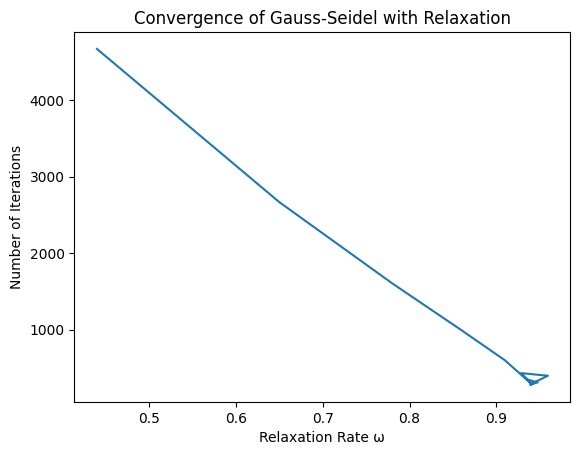

In [21]:
phi = ((1 + np.sqrt(5))/2.0)

def gauss_siedel_with_relaxation(rho, omega=0.9, tol=1e-10, max_iter=10000):
    M, N = rho.shape
    phi = np.zeros((M, N))
    err = []
    for it in range(max_iter):
        phi_old = phi.copy()
        for i in range(1, M-1):
            for j in range(1, N-1):
                phi[i, j] = -omega * phi[i, j] + (( 1 + omega) / 4) * (
                    phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1] + electron_charge * rho[i, j] / epsilon_0
                )
        max_error = np.max(np.abs(phi - phi_old))
        err.append(max_error)
        if max_error < tol:
            print(f'Converged in {it} iterations.')
            break
    return phi, err

def golden_ratio_search(f, x1, x4, rho, tol=1e-3):
    x2 = x4 - (x4 - x1) / phi
    x3 = x1 + (x4 - x1) / phi
    print(x2, x3, phi)
    err = np.empty((0, 2))
    while np.abs(x4 - x1) > tol:

        f2 = len(f(rho, x2)[1])
        print(f2)
        f3 = len(f(rho, x3)[1])
        print(f3)
        print(f2)
        err = np.append(err, [[x2, f2], [x3, f3]], axis=0)
        if f2 < f3:
            x4 = x3
            x3 = x2
            x2 = x4 - (x4 - x1) / phi
        else:
            x1 = x2
            x2 = x3
            x3 = x1 + (x4 - x1) / phi
        if np.abs(x4 - x1) < tol:
            err = np.vstack([err, [(x1 + x4) / 2.0, (f2 + f3) / 2.0]])
    return (x1 + x4) / 2.0, err
optimal_omega, err = golden_ratio_search(gauss_siedel_with_relaxation, 0.1, 0.99, rho)
print(err)
print(f'Optimal relaxation factor ω: {optimal_omega}')
plt.plot(err[:, 0], err[:, 1])
plt.title('Convergence of Gauss-Seidel with Relaxation')
plt.ylabel('Number of Iterations')
plt.xlabel('Relaxation Rate ω')
plt.show()
